In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_submission = pd.read_csv('data/sample_submission.csv')


In [288]:
df_train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [289]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __20758 entries__, ranging from index 0 to 20757.
    
    
* __Columns__: There are __18 columns__ in the dataset corresponding to various attributes of the patients and results of tests.
    
    
* __Data Types__:
    - Half of the columns (9 out of 18) are of the __object__ data type.
    
    
* __Missing Values__: There don't appear to be any missing values in the dataset as each column has 20758 non-null entries.

In [290]:
df_train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [291]:
# Define the continuous features
continuous_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP' ,'CH2O','FAF','TUE']

# Identify the features to be converted to object data type
categorical_features = [feature for feature in df_train.columns if feature not in continuous_features]


<span style="font-size: 200%; font-weight: bold;">Let's dive into the summary statistics for our __numerical__attributes::</span> 

In [292]:
df_train.describe().T

count          mean          std    min          25%           50%  \
id      20758.0  10378.500000  5992.462780   0.00  5189.250000  10378.500000   
Age     20758.0     23.841804     5.688072  14.00    20.000000     22.815416   
Height  20758.0      1.700245     0.087312   1.45     1.631856      1.700000   
Weight  20758.0     87.887768    26.379443  39.00    66.000000     84.064875   
FCVC    20758.0      2.445908     0.533218   1.00     2.000000      2.393837   
NCP     20758.0      2.761332     0.705375   1.00     3.000000      3.000000   
CH2O    20758.0      2.029418     0.608467   1.00     1.792022      2.000000   
FAF     20758.0      0.981747     0.838302   0.00     0.008013      1.000000   
TUE     20758.0      0.616756     0.602113   0.00     0.000000      0.573887   

                 75%           max  
id      15567.750000  20757.000000  
Age        26.000000     61.000000  
Height      1.762887      1.975663  
Weight    111.600553    165.057269  
FCVC        3.000000      3.000000  
NCP         3.000000      4.000000  
CH2O        2.549617      3.000000  
FAF         1.587406      3.000000  
TUE         1.000000      2.000000

<a id="import"></a>
# <p style="background-color:#ef271b; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:25px ;">EDA </p>


In [293]:
df_train.duplicated().sum()

0

<a id="univariate"></a>
# <b></span><span style='color:red'> Univariate Analysis</span></b>

C:\Users\melih\AppData\Local\Temp\ipykernel_5516\1328658610.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
C:\Users\melih\AppData\Local\Temp\ipykernel_5516\1328658610.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
C:\Users\melih\AppData\Local\Temp\ipykernel_5516\1328658610.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
C:\Users\melih\AppData\Local\Temp\ipykernel_5516\1328658610.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)


C:\Users\melih\AppData\Local\Temp\ipykernel_5516\1328658610.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
C:\Users\melih\AppData\Local\Temp\ipykernel_5516\1328658610.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
C:\Users\melih\AppData\Local\Temp\ipykernel_5516\1328658610.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
C:\Users\melih\AppData\Local\Temp\ipykernel_5516\1328658610.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)


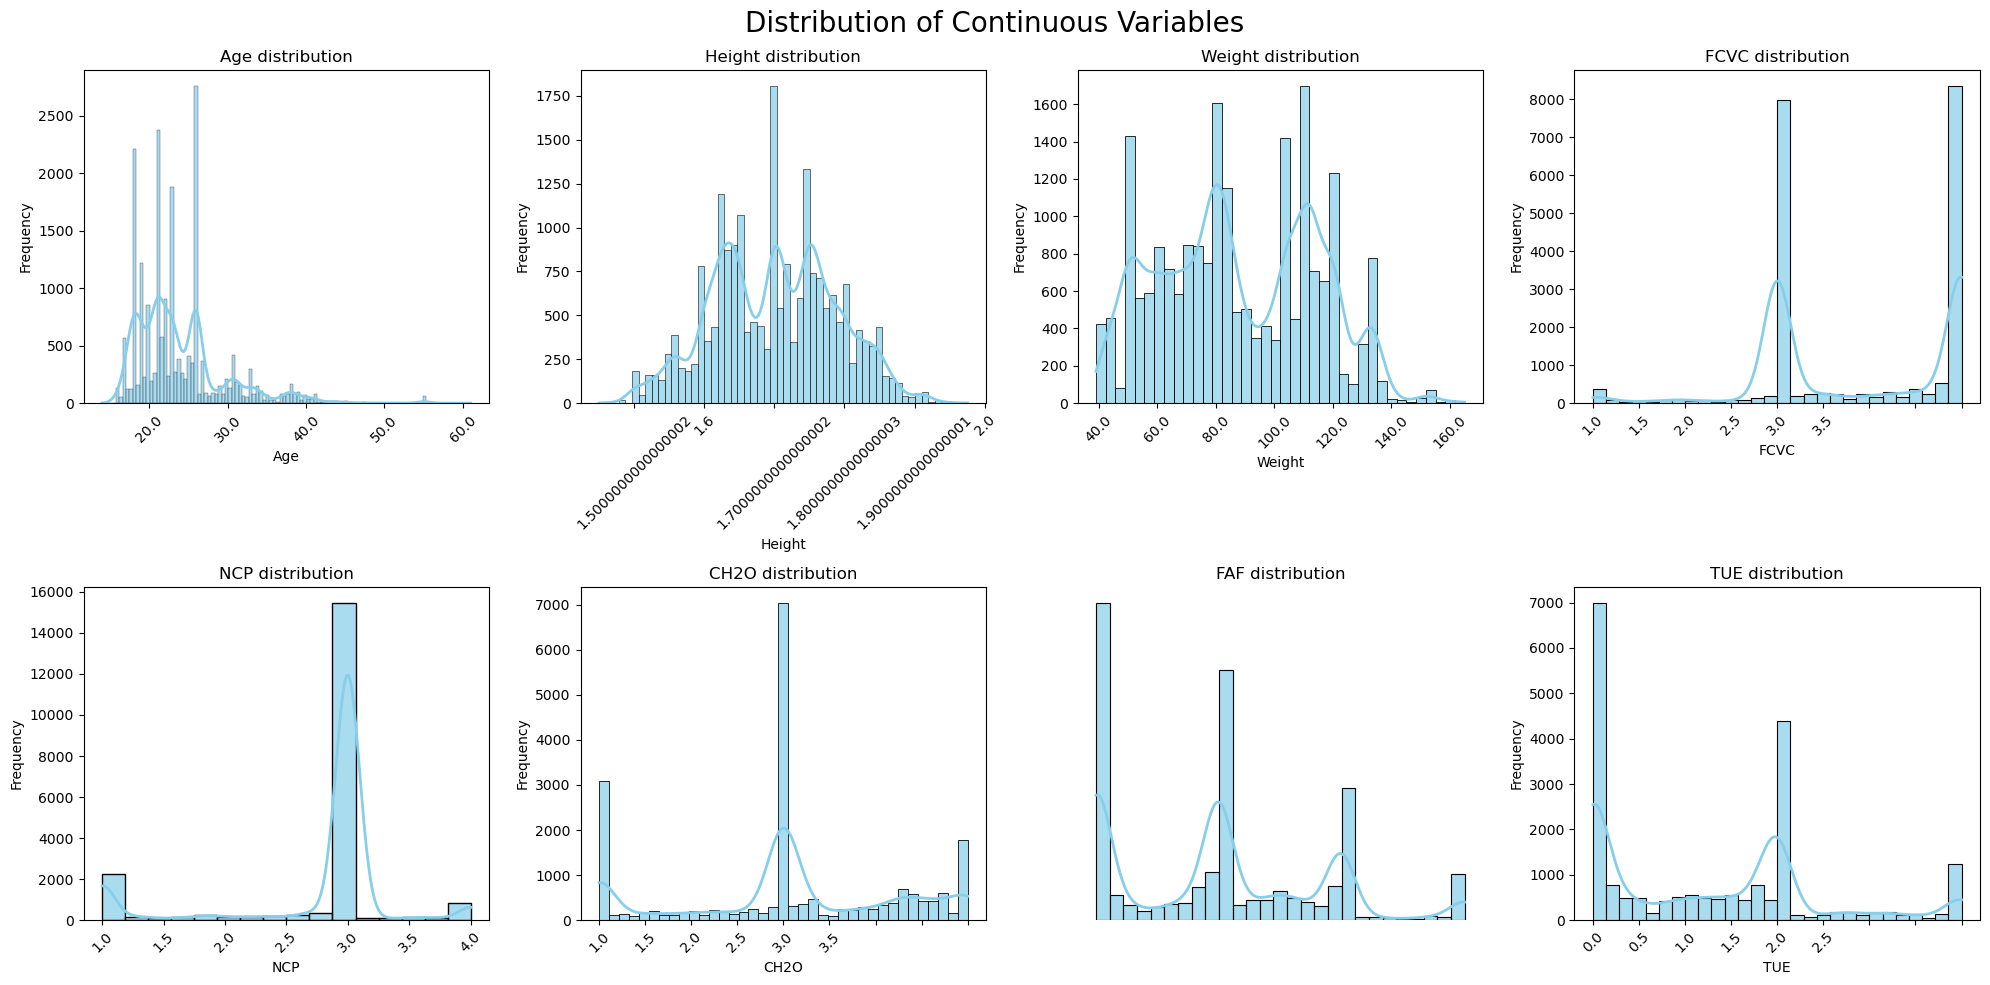

In [294]:
df_continuous = df_train[continuous_features]

fig , ax = plt.subplots(2,4, figsize=(20,10))

for i, feature in enumerate(continuous_features):
    x = i // 4
    y = i % 4
    
    values , bins = np.histogram(df_continuous[feature], bins=20 , range=(df_continuous[feature].min(), df_continuous[feature].max()))
    
    graph = sns.histplot(df_continuous[feature], kde=True, ax=ax[x,y] , edgecolor='black' , color='skyblue' , alpha=0.7 , line_kws = {'linewidth':2})
    
    ax[x,y].set_title(f'{feature} distribution')
    ax[x,y].set_xlabel(feature)
    ax[x,y].set_ylabel('Frequency')
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

    
    

<a id="cat_uni"></a>
### <b><span style='color:#ff826e'></span><span style='color:red'> Categorical Variables Univariate Analysis</span></b>  

In [295]:
categorical_features

['id',
 'Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [296]:
categorical_features.remove('id')

In [297]:
df_categorical = df_train[categorical_features]


In [298]:
# mapping = {
#     "0": 'Insufficient_Weight',
#     "1": 'Normal_Weight',
#     "2": 'Obesity_Type_I',
#     "3": 'Obesity_Type_II',
#     "4": 'Obesity_Type_III',
#     "5": 'Overweight_Level_I',
#     "6": 'Overweight_Level_II',
# }

# df_train['NObeyesdad'] = df_train['NObeyesdad'].map(mapping)

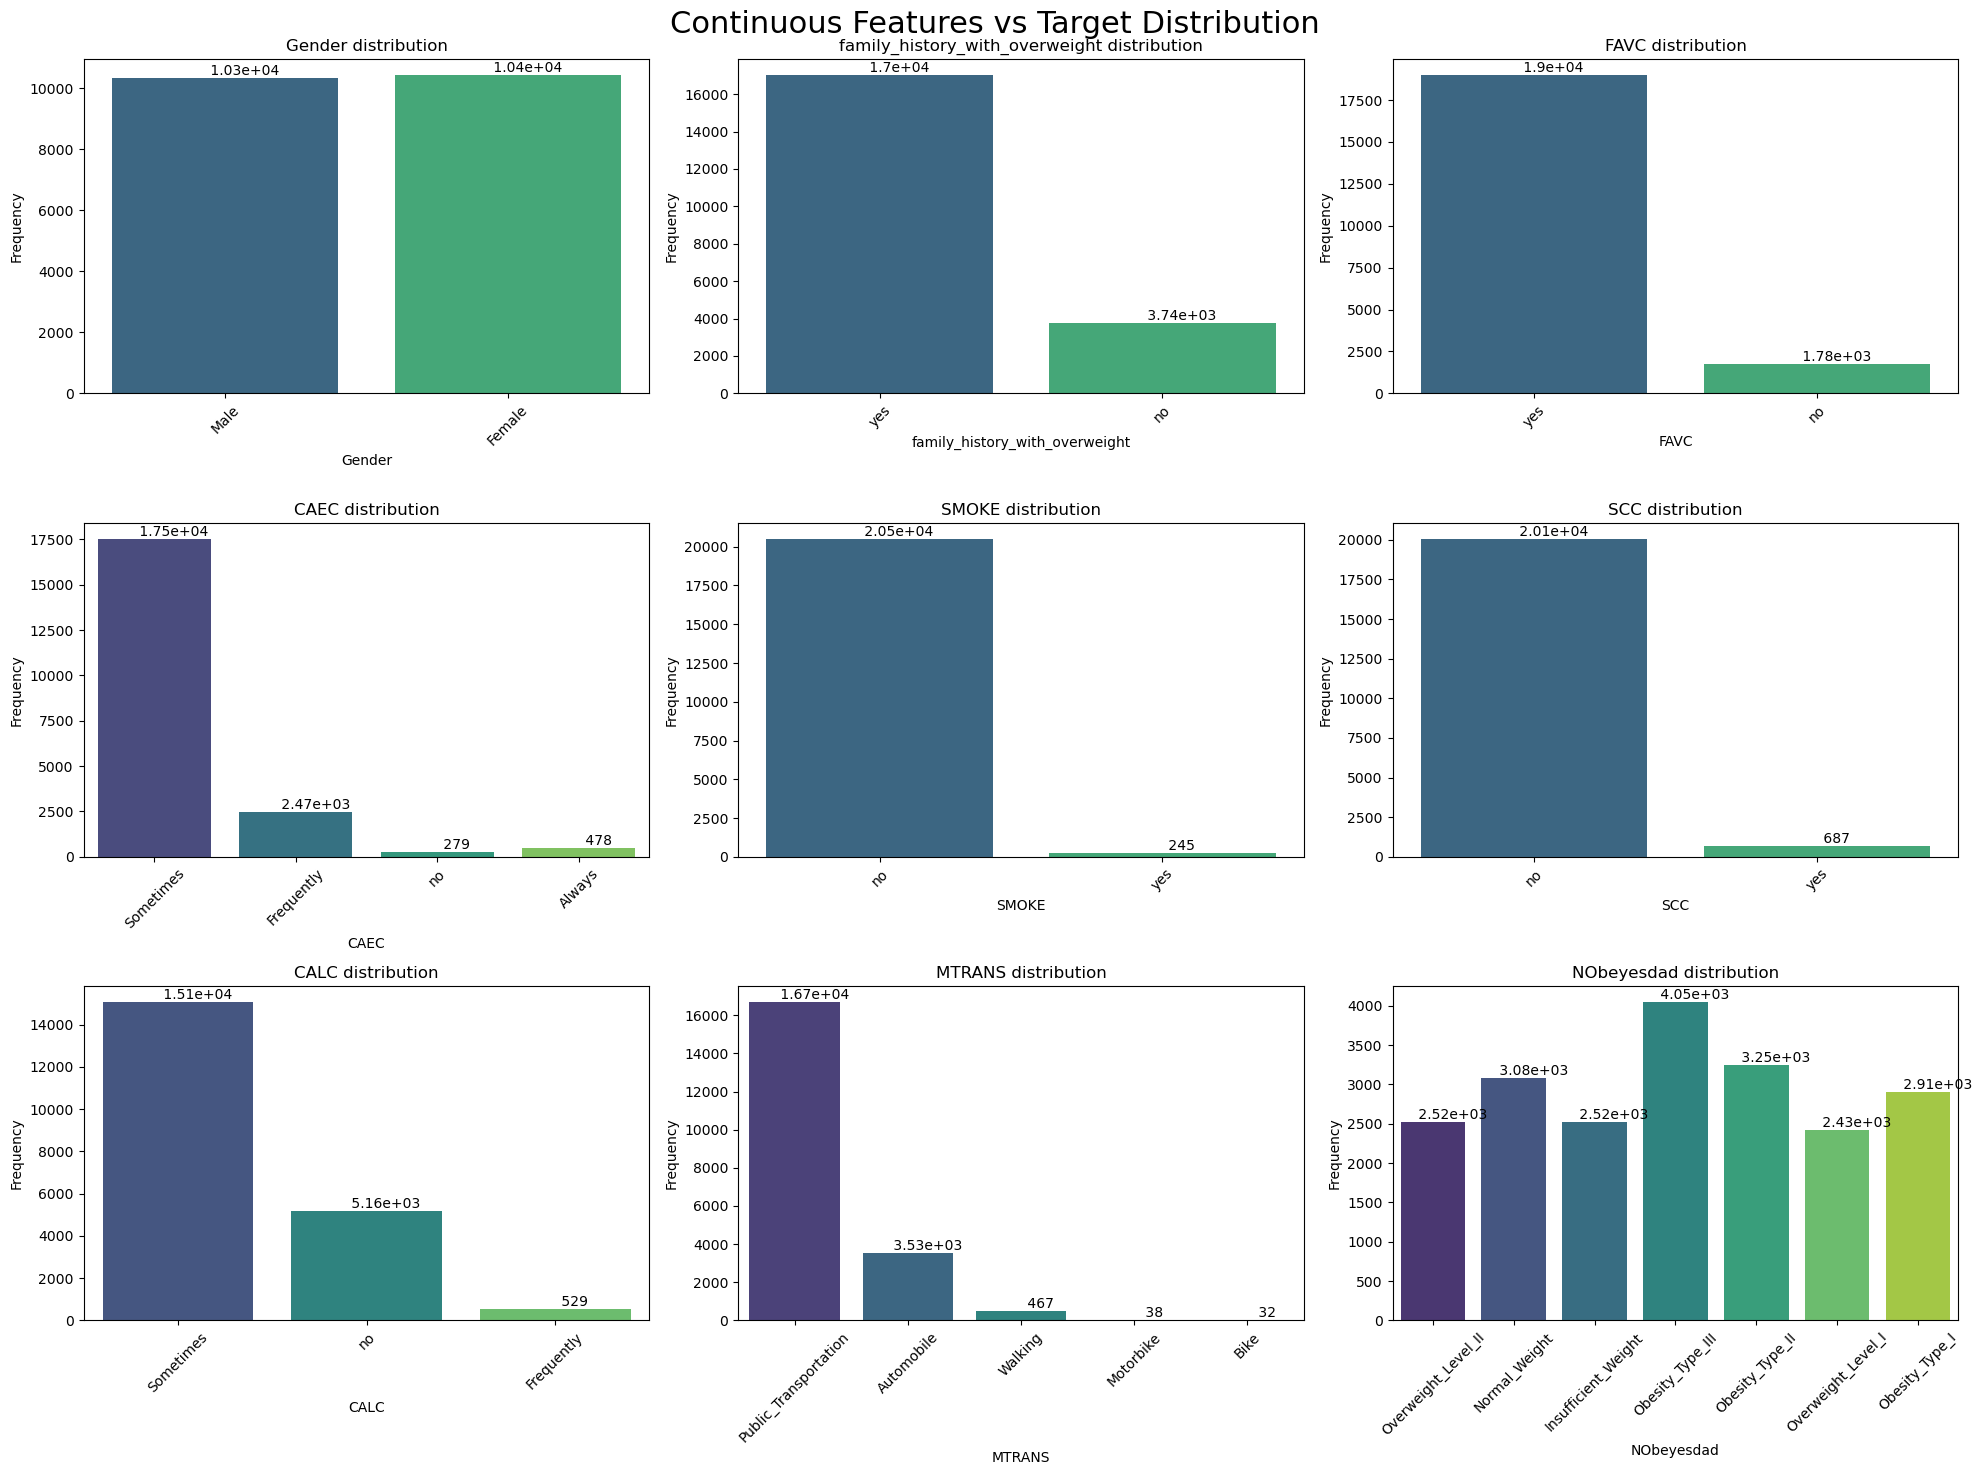

In [299]:
fig, ax = plt.subplots(3,3, figsize=(20,15))

for i, feature in enumerate(categorical_features):
    
    x = i // 3
    y = i % 3
    
    graph = sns.countplot(x=feature, data=df_categorical, ax=ax[x,y], palette='viridis')
    ax[x,y].set_title(f'{feature} distribution')
    ax[x,y].set_xlabel(feature)
    ax[x,y].set_ylabel('Frequency')
    xlabel = ax[x,y].get_xticklabels()
    ax[x,y].set_xticklabels(xlabel, rotation=45)
    
    
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
        
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()        

<a id="bivariate"></a>
# <b><span style='color:red'> Bivariate Analysis</span></b>

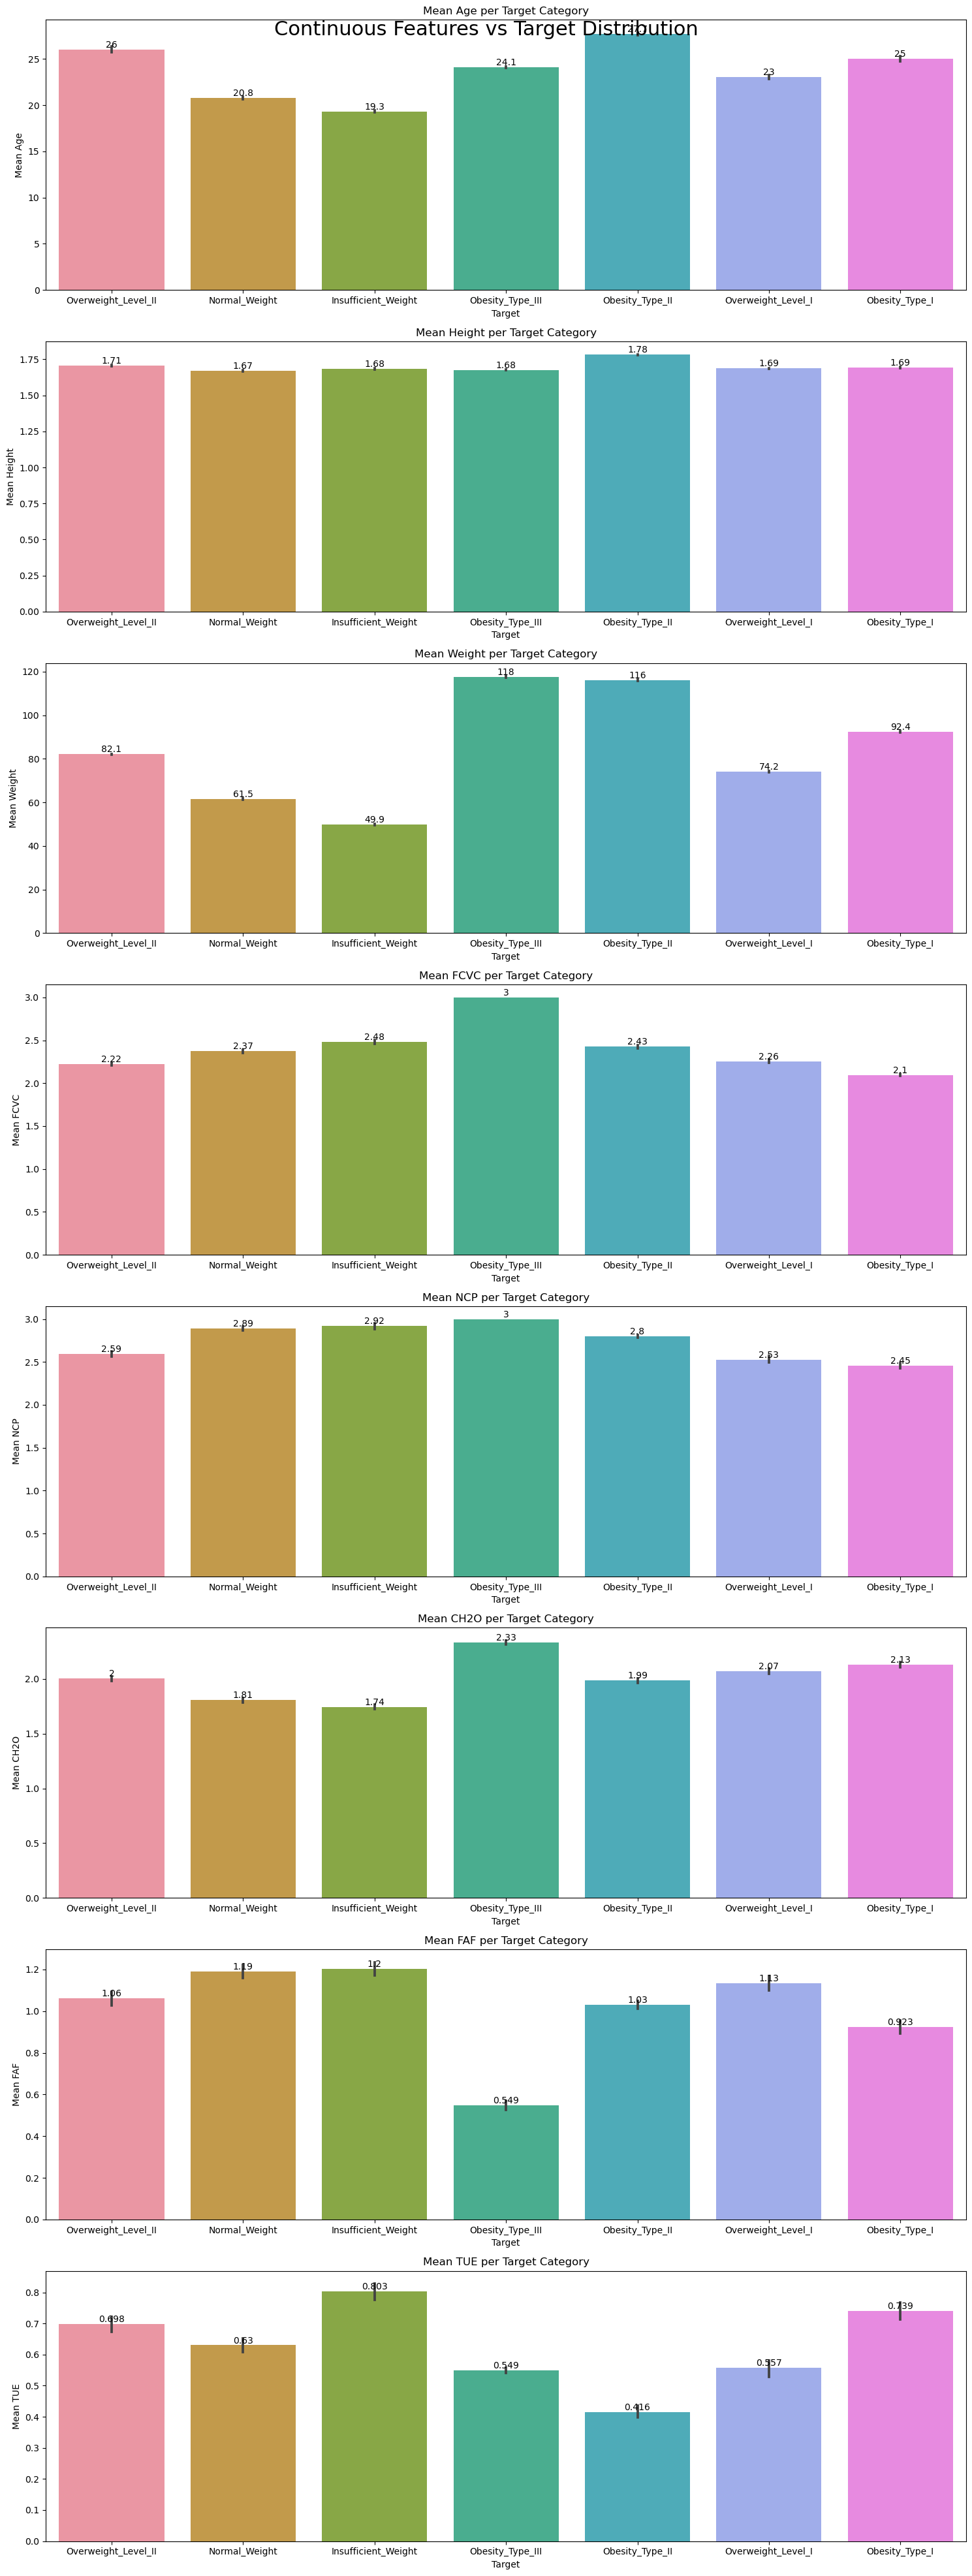

In [300]:
# Set color palette
fig, ax = plt.subplots(len(continuous_features), 1, figsize=(15, 5 * len(continuous_features)))

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df_train, x="NObeyesdad", y=col, ax=ax[i])
    ax[i].set_title(f'Mean {col} per Target Category')
    ax[i].set_xlabel('Target')
    ax[i].set_ylabel(f'Mean {col}')

    # Add mean values to the barplot
    for p in graph.patches:
        graph.annotate(f'{p.get_height():.3g}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

<a id="cat_target"></a>
### <b><span style='color:#ff826e'></span><span style='color:red'> Categorical Features vs Target</span></b>  

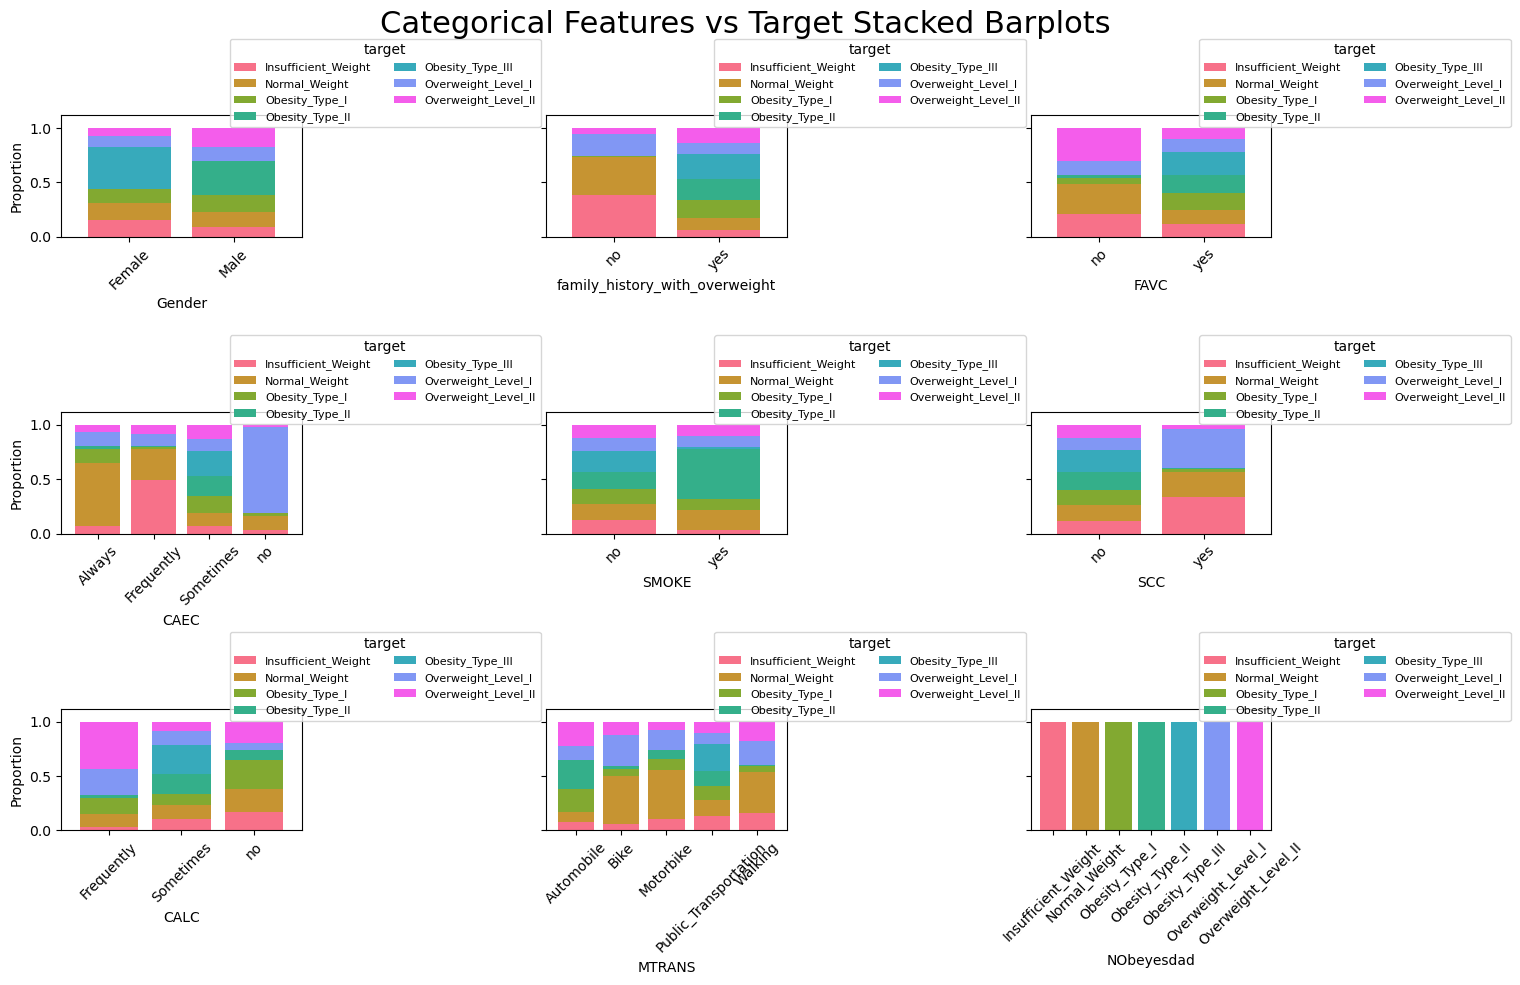

In [301]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

custom_palette = sns.color_palette("husl", n_colors=len(df_train['NObeyesdad'].unique()))


for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df_train[col], columns=df_train['NObeyesdad'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df_train[col], columns=df_train['NObeyesdad'], normalize='index')


    
    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8,
                        legend=False, ylabel='Proportion', sharey=True , color=custom_palette)
    
    # # Add the proportions and counts of the individual bars to our plot
    # for idx, val in enumerate([*cross_tab.index.values]):
    #     for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
    #         ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
    #                      s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
    #                      color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=45)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

<a id="missing"></a>
# <b><span style='color:red'> Missing Value Treatment</span></b>

In [302]:
df_train.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

there is no missing value in the dataset

<a id="outlier"></a>
# <b><span style='color:red'> Outlier Treatment</span></b>

In [303]:
continuous_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [304]:
Q1 = df_train[continuous_features].quantile(0.25)
Q3 = df_train[continuous_features].quantile(0.75)

IQR = Q3 - Q1

outliers = (df_train[continuous_features] < (Q1 - 1.5 * IQR)) | (df_train[continuous_features] > (Q3 + 1.5 * IQR))

outliers.sum()

Age       1074
Height       4
Weight       0
FCVC         0
NCP       6052
CH2O         0
FAF          0
TUE          0
dtype: int64

<a id="encoding"></a>
# <b><span style='color:red'> Categorical Features Encoding</span></b>

In [305]:
continuous_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [306]:
categorical_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [307]:
df_train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [308]:
df_train[categorical_features].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [309]:
df_train['CAEC'].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [310]:
df_train['CALC'].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [311]:
# ordinal features: CAEC , CALC 
ordinal_features = ['CAEC', 'CALC']

# encoding the ordinal features
def encode_ordinal_features(df, ordinal_features):
    df[ordinal_features] = df[ordinal_features].replace({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
    return df


df_train = encode_ordinal_features(df_train, ordinal_features)
df_test = encode_ordinal_features(df_test, ordinal_features)


In [312]:
df_train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP  CAEC SMOKE      CH2O SCC       FAF       TUE  \
0  yes  2.000000  2.983297     1    no  2.763573  no  0.000000  0.976473   
1  yes  2.000000  3.000000     2    no  2.000000  no  1.000000  1.000000   
2  yes  1.880534  1.411685     1    no  1.910378  no  0.866045  1.673584   
3  yes  3.000000  3.000000     1    no  1.674061  no  1.467863  0.780199   
4  yes  2.679664  1.971472     1    no  1.979848  no  1.967973  0.931721   

   CALC                 MTRANS           NObeyesdad  
0     1  Public_Transportation  Overweight_Level_II  
1     0             Automobile        Normal_Weight  
2     0  Public_Transportation  Insufficient_Weight  
3     1  Public_Transportation     Obesity_Type_III  
4     1  Public_Transportation  Overweight_Level_II

In [313]:
categorical_features.remove(ordinal_features[0])
categorical_features.remove(ordinal_features[1])

In [314]:
nominal_features = categorical_features

In [315]:
nominal_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'SMOKE',
 'SCC',
 'MTRANS',
 'NObeyesdad']

In [316]:
# encoding the nominal features

def encode_nominal_features(df, nominal_features):
    df = pd.get_dummies(df, columns=nominal_features, drop_first=True, dtype='int64')
    return df

nominal_features.remove('NObeyesdad')
df_train = encode_nominal_features(df_train, nominal_features)
df_test = encode_nominal_features(df_test, nominal_features)

In [317]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  20758 non-null  int64  
 1   Age                                 20758 non-null  float64
 2   Height                              20758 non-null  float64
 3   Weight                              20758 non-null  float64
 4   FCVC                                20758 non-null  float64
 5   NCP                                 20758 non-null  float64
 6   CAEC                                20758 non-null  int64  
 7   CH2O                                20758 non-null  float64
 8   FAF                                 20758 non-null  float64
 9   TUE                                 20758 non-null  float64
 10  CALC                                20758 non-null  int64  
 11  NObeyesdad                          20758

In [318]:
df_train.head()

id        Age    Height      Weight      FCVC       NCP  CAEC      CH2O  \
0   0  24.443011  1.699998   81.669950  2.000000  2.983297     1  2.763573   
1   1  18.000000  1.560000   57.000000  2.000000  3.000000     2  2.000000   
2   2  18.000000  1.711460   50.165754  1.880534  1.411685     1  1.910378   
3   3  20.952737  1.710730  131.274851  3.000000  3.000000     1  1.674061   
4   4  31.641081  1.914186   93.798055  2.679664  1.971472     1  1.979848   

        FAF       TUE  ...           NObeyesdad Gender_Male  \
0  0.000000  0.976473  ...  Overweight_Level_II           1   
1  1.000000  1.000000  ...        Normal_Weight           0   
2  0.866045  1.673584  ...  Insufficient_Weight           0   
3  1.467863  0.780199  ...     Obesity_Type_III           0   
4  1.967973  0.931721  ...  Overweight_Level_II           1   

   family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  \
0                                   1         1          0        0   
1                                   1         1          0        0   
2                                   1         1          0        0   
3                                   1         1          0        0   
4                                   1         1          0        0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0            0                 0                             1               0  
1            0                 0                             0               0  
2            0                 0                             1               0  
3            0                 0                             1               0  
4            0                 0                             1               0  

[5 rows x 21 columns]

In [319]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  20758 non-null  int64  
 1   Age                                 20758 non-null  float64
 2   Height                              20758 non-null  float64
 3   Weight                              20758 non-null  float64
 4   FCVC                                20758 non-null  float64
 5   NCP                                 20758 non-null  float64
 6   CAEC                                20758 non-null  int64  
 7   CH2O                                20758 non-null  float64
 8   FAF                                 20758 non-null  float64
 9   TUE                                 20758 non-null  float64
 10  CALC                                20758 non-null  int64  
 11  NObeyesdad                          20758

In [320]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [321]:
# Scale the continuous features

scaler = StandardScaler()

df_train[continuous_features] = scaler.fit_transform(df_train[continuous_features])
df_test[continuous_features] = scaler.transform(df_test[continuous_features])

df_train.head()

id       Age    Height    Weight      FCVC       NCP  CAEC      CH2O  \
0   0  0.105699 -0.002828 -0.235713 -0.836279  0.314684     1  1.206594   
1   1 -1.027052 -1.606291 -1.170931 -0.836279  0.338364     2 -0.048349   
2   2 -1.027052  0.128451 -1.430012 -1.060332 -1.913423     1 -0.195644   
3   3 -0.507929  0.120090  1.644770  1.039171  0.338364     1 -0.584035   
4   4  1.371197  2.450367  0.224054  0.438397 -1.119801     1 -0.081469   

        FAF       TUE  ...           NObeyesdad Gender_Male  \
0 -1.171141  0.597438  ...  Overweight_Level_II           1   
1  0.021775  0.636513  ...        Normal_Weight           0   
2 -0.138022  1.755239  ...  Insufficient_Weight           0   
3  0.579896  0.271455  ...     Obesity_Type_III           0   
4  1.176486  0.523111  ...  Overweight_Level_II           1   

   family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  \
0                                   1         1          0        0   
1                                   1         1          0        0   
2                                   1         1          0        0   
3                                   1         1          0        0   
4                                   1         1          0        0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0            0                 0                             1               0  
1            0                 0                             0               0  
2            0                 0                             1               0  
3            0                 0                             1               0  
4            0                 0                             1               0  

[5 rows x 21 columns]

In [322]:
X = df_train.drop(['id', 'NObeyesdad'], axis=1)
y = df_train['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


In [325]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=accuracy_score)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

  0%|          | 0/29 [00:00<?, ?it/s]

 90%|████████▉ | 26/29 [00:59<00:06,  2.26s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2035
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 19
[LightGBM] [Info] Start training from score -2.125658
[LightGBM] [Info] Start training from score -1.904332
[LightGBM] [Info] Start training from score -1.954923
[LightGBM] [Info] Start training from score -1.851948
[LightGBM] [Info] Start training from score -1.647551
[LightGBM] [Info] Start training from score -2.127172
[LightGBM] [Info] Start training from score -2.107657


100%|██████████| 29/29 [00:59<00:00,  2.06s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.91               0.90    None      0.91   
RandomForestClassifier             0.90               0.89    None      0.90   
BaggingClassifier                  0.89               0.87    None      0.89   
ExtraTreesClassifier               0.88               0.87    None      0.88   
SVC                                0.86               0.84    None      0.86   
LogisticRegression                 0.86               0.84    None      0.86   
DecisionTreeClassifier             0.85               0.83    None      0.85   
LinearDiscriminantAnalysis         0.82               0.80    None      0.82   
NuSVC                              0.81               0.79    None      0.81   
ExtraTreeClassifier                0.77               0.74    None      0.77   
CalibratedClassifierCV             0.76               0.73    None      0.76   
LinearSVC                          0.76               0.73    None      0.75   
KNeighborsClassifier               0.76               0.73    None      0.75   
LabelPropagation                   0.74               0.71    None      0.74   
LabelSpreading                     0.74               0.71    None      0.74   
SGDClassifier                      0.71               0.68    None      0.71   
BernoulliNB                        0.66               0.62    None      0.65   
Perceptron                         0.64               0.60    None      0.64   
PassiveAggressiveClassifier        0.65               0.60    None      0.64   
QuadraticDiscriminantAnalysis      0.57               0.60    None      0.53   
RidgeClassifier                    0.64               0.60    None      0.61   
RidgeClassifierCV                  0.64               0.60    None      0.61   
NearestCentroid                    0.63               0.59    None      0.62   
GaussianNB                         0.63               0.59    None      0.60   
AdaBoostClassifier                 0.42               0.45    None      0.31   
DummyClassifier                    0.20               0.14    None      0.07   

                               accuracy_score  Time Taken  
Model                                                      
LGBMClassifier                           0.91        0.72  
RandomForestClassifier                   0.90        2.74  
BaggingClassifier                        0.89        0.95  
ExtraTreesClassifier                     0.88        1.83  
SVC                                      0.86        5.51  
LogisticRegression                       0.86        0.30  
DecisionTreeClassifier                   0.85        0.18  
LinearDiscriminantAnalysis               0.82        0.10  
NuSVC                                    0.81       17.77  
ExtraTreeClassifier                      0.77        0.06  
CalibratedClassifierCV                   0.76        0.94  
LinearSVC                                0.76        3.87  
KNeighborsClassifier                     0.76        0.30  
LabelPropagation                         0.74        9.31  
LabelSpreading                           0.74       12.70  
SGDClassifier                            0.71        0.26  
BernoulliNB                              0.66        0.09  
Perceptron                               0.64        0.11  
PassiveAggressiveClassifier              0.65        0.10  
QuadraticDiscriminantAnalysis            0.57        0.07  
RidgeClassifier                          0.64        0.09  
RidgeClassifierCV                        0.64        0.09  
NearestCentroid                          0.63        0.07  
GaussianNB                               0.63        0.06  
AdaBoostClassifier                       0.42        1.33  
DummyClassifier                          0.20        0.06

In [326]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [327]:
clf = lgb.LGBMClassifier()

param_grid = {
    'num_leaves': [10 ,20 , 31, 50 , 70 , 127],
    'min_data_in_leaf': [10, 20, 30, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [100, 200, 300, 400],
}

grid_search = GridSearchCV(clf , param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 13284, number of used features: 19
[LightGBM] [Info] Start training from score -2.125976
[LightGBM] [Info] Start training from score -1.903969
[LightGBM] [Info] Start training from score -1.955289
[LightGBM] [Info] Start training from score -1.851791
[LightGBM] [Info] Start training from score -1.647726
[LightGBM] [Info] Start training from score -2.127239
[LightGBM] [Info] Start training from score -2.107225
[LightGBM] [Warning] min_